In [1]:
# modules we'll use
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

import scipy.stats as stats

from sklearn.feature_selection import SelectKBest, RFE, f_regression

import os
import missingno as msno

#Access Stored Data
from env import host,db,protocol,password,user,mysqlcon
import wrangle
import env

In [2]:
#stored the dataframe into a variable
df = wrangle.get_zillow_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56078 entries, 0 to 56077
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           56078 non-null  int64  
 1   bedrooms             56078 non-null  float64
 2   bathrooms            56078 non-null  float64
 3   area                 55848 non-null  float64
 4   tax_amount           55949 non-null  float64
 5   numberofstories      15493 non-null  float64
 6   structure_taxvalue   55875 non-null  float64
 7   zoning_desc          37239 non-null  object 
 8   trans_date           56078 non-null  object 
 9   year_built           55830 non-null  float64
 10  fips                 56078 non-null  float64
 11  prop_landuse_desc    56078 non-null  object 
 12  county_landuse_code  56078 non-null  object 
 13  tax_value            56070 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 6.0+ MB


In [3]:
df.describe()

,Unnamed: 0,bedrooms,bathrooms,area,tax_amount,numberofstories,structure_taxvalue,year_built,fips,tax_value
count,56078.000000,56078.000000,56078.000000,55848.000000,5.594900e+04,15493.000000,5.587500e+04,55830.000000,56078.000000,5.607000e+04
mean,28038.500000,3.289169,2.239497,1868.285704,5.589363e+03,1.384690,1.799424e+05,1961.186262,6048.841792,4.576511e+05
std,16188.468535,0.958664,1.006977,966.973076,8.541810e+03,0.532645,3.667285e+05,21.995171,21.237740,6.635615e+05
min,0.000000,0.000000,0.000000,20.000000,8.300000e+00,1.000000,5.000000e+00,1862.000000,6037.000000,9.000000e+00
25%,14019.250000,3.000000,2.000000,1260.000000,2.523760e+03,1.000000,7.512250e+04,1949.000000,6037.000000,1.870265e+05
50%,28038.500000,3.000000,2.000000,1630.000000,4.130480e+03,1.000000,1.237040e+05,1958.000000,6037.000000,3.295320e+05
75%,42057.750000,4.000000,3.000000,2217.000000,6.410560e+03,2.000000,2.063965e+05,1976.000000,6059.000000,5.335282e+05
max,56077.000000,25.000000,20.000000,26345.000000,1.195296e+06,3.000000,6.640493e+07,2016.000000,6111.000000,6.750649e+07


In [4]:
df = wrangle.remove_outliers(df, 1.5, ['bedrooms', 'bathrooms', 'area', 'tax_value', 'tax_amount','structure_taxvalue','numberofstories'])

In [5]:
df.fips = df.fips.astype(object)
df.year_built = df.year_built.astype(object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13689 entries, 639 to 55838
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           13689 non-null  int64  
 1   bedrooms             13689 non-null  float64
 2   bathrooms            13689 non-null  float64
 3   area                 13689 non-null  float64
 4   tax_amount           13689 non-null  float64
 5   numberofstories      13689 non-null  float64
 6   structure_taxvalue   13689 non-null  float64
 7   zoning_desc          1 non-null      object 
 8   trans_date           13689 non-null  object 
 9   year_built           13672 non-null  object 
 10  fips                 13689 non-null  object 
 11  prop_landuse_desc    13689 non-null  object 
 12  county_landuse_code  13689 non-null  object 
 13  tax_value            13689 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 1.6+ MB


In [7]:
imputer = SimpleImputer(strategy='median')
imputer.fit(df[['tax_value','year_built','numberofstories','area','tax_amount','structure_taxvalue']])
df[['year_built','numberofstories','area','tax_amount','structure_taxvalue','tax_value']] = imputer.transform(df[['year_built','numberofstories','area','tax_amount','structure_taxvalue','tax_value']])


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [8]:
df['zoning_desc'] = df['zoning_desc'].fillna('Unknown')

In [9]:
df.isnull().sum() / len(df) * 100

Unnamed: 0             0.0
bedrooms               0.0
bathrooms              0.0
area                   0.0
tax_amount             0.0
numberofstories        0.0
structure_taxvalue     0.0
zoning_desc            0.0
trans_date             0.0
year_built             0.0
fips                   0.0
prop_landuse_desc      0.0
county_landuse_code    0.0
tax_value              0.0
dtype: float64

In [10]:
df = df.drop(columns='Unnamed: 0')

In [11]:
df['zoning_desc']=LabelEncoder().fit_transform(df['zoning_desc'])
df['trans_date']=LabelEncoder().fit_transform(df['trans_date'])
df['year_built']=LabelEncoder().fit_transform(df['year_built'])
df['prop_landuse_desc']=LabelEncoder().fit_transform(df['prop_landuse_desc'])
df['county_landuse_code']=LabelEncoder().fit_transform(df['county_landuse_code'])
df['fips']=LabelEncoder().fit_transform(df['fips'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13689 entries, 639 to 55838
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bedrooms             13689 non-null  float64
 1   bathrooms            13689 non-null  float64
 2   area                 13689 non-null  float64
 3   tax_amount           13689 non-null  float64
 4   numberofstories      13689 non-null  float64
 5   structure_taxvalue   13689 non-null  float64
 6   zoning_desc          13689 non-null  int64  
 7   trans_date           13689 non-null  int64  
 8   year_built           13689 non-null  int64  
 9   fips                 13689 non-null  int64  
 10  prop_landuse_desc    13689 non-null  int64  
 11  county_landuse_code  13689 non-null  int64  
 12  tax_value            13689 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 1.5 MB


In [13]:
df.isna().sum()

bedrooms               0
bathrooms              0
area                   0
tax_amount             0
numberofstories        0
structure_taxvalue     0
zoning_desc            0
trans_date             0
year_built             0
fips                   0
prop_landuse_desc      0
county_landuse_code    0
tax_value              0
dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
train_validate, test = train_test_split(df,  test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [15]:
train.shape, validate.shape, test.shape, train_validate.shape

((7665, 13), (3286, 13), (2738, 13), (10951, 13))

Text(0.5, 1.0, 'Scaled')

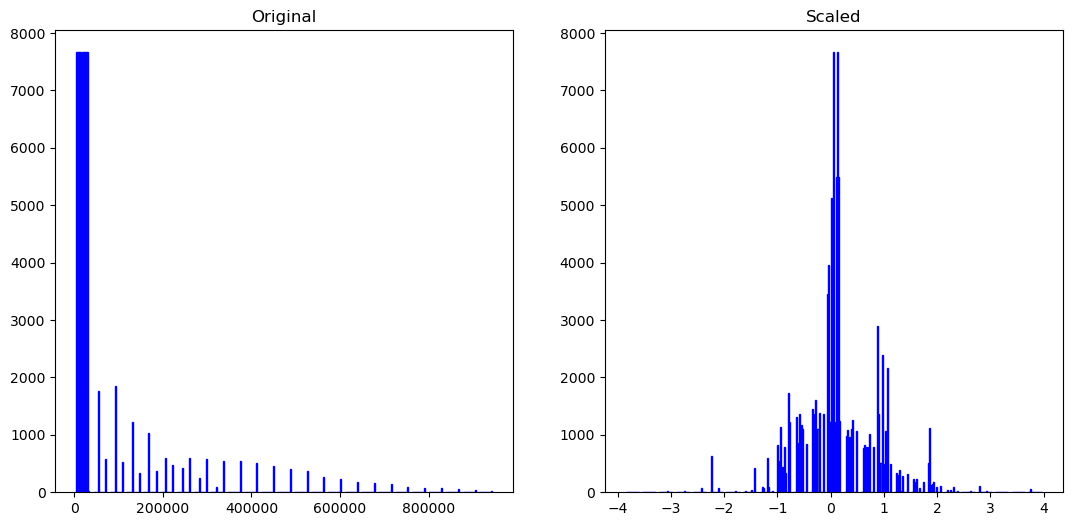

In [16]:
scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train)

x_train_scaled = scaler.transform(train)
x_validate_scaled = scaler.transform(validate)
x_test_scaled = scaler.transform(test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='blue')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='blue')
plt.title('Scaled')

In [17]:
#Lets run a chi squared to compare proportions, to have more confidence
#set variable alpha to 0.05
alpha = 0.05
#set null_hypothesis and alternative_hypothesis variables to a string
#to represent the possible results. 
null_hypothesis = "there is no relationship between tax value and bedrooms"
alternative_hypothesis = "there is a relationship between tax_value and bedrooms"

#Setup a crosstab of observed churn to tenure
observed = pd.crosstab(train.tax_value, train['bedrooms'])

#The stats.chi2_contigency(observed) function does the heavy lifting here. It computes the 
#chi-square statistic and p-value for the hypothesis test of independence. Then passes the 
#values into the variables.
chi2, p, degf, expected = stats.chi2_contingency(observed)

#If statement to print the resultt. If p < alpha you get the first two statements
#If not you get the else statement. 
if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Fail to reject the null
Insufficient evidence to reject the null


0.3169965076031478

In [18]:
from scipy.stats import ttest_ind
corr, p = stats.pearsonr(train.tax_value, train['area'])
corr, p

(0.36013270688554083, 1.7909007972316992e-233)

In [19]:
#Lets run a chi squared to compare proportions, to have more confidence
#set variable alpha to 0.05
alpha = 0.05
#set null_hypothesis and alternative_hypothesis variables to a string
#to represent the possible results. 
null_hypothesis = "there is no relationship between tax value and area"
alternative_hypothesis = "there is a relationship between tax_value and area"

#Setup a crosstab of observed churn to tenure
observed = pd.crosstab(train.tax_value, train['area'])

#The stats.chi2_contigency(observed) function does the heavy lifting here. It computes the 
#chi-square statistic and p-value for the hypothesis test of independence. Then passes the 
#values into the variables.
chi2, p, degf, expected = stats.chi2_contingency(observed)

#If statement to print the resultt. If p < alpha you get the first two statements
#If not you get the else statement. 
if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that there is no relationship between tax value and area
Sufficient evidence to move forward understanding that there is a relationship between tax_value and area


5.4e-322

In [20]:
train_sample = train.sample(n=1000)
specific_cols = ['bedrooms', 'bathrooms', 'area', 'tax_amount', 'tax_value']

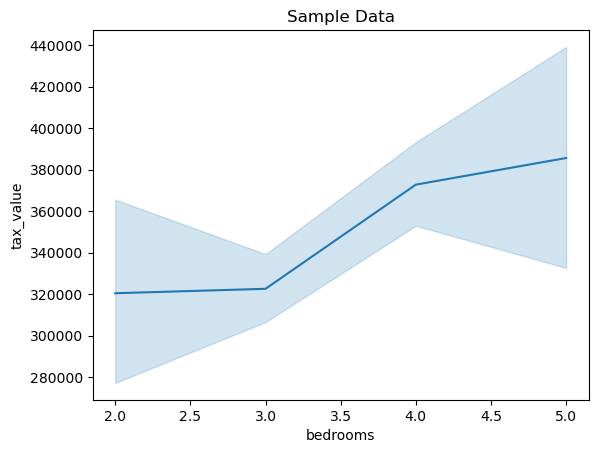

In [21]:
fig, ax = plt.subplots()
sns.lineplot(x='bedrooms', y='tax_value', data=train_sample, ax=ax)
ax.set(title='Sample Data');

bedrooms               0
bathrooms              0
area                   0
tax_amount             0
numberofstories        0
structure_taxvalue     0
zoning_desc            0
trans_date             0
year_built             0
fips                   0
prop_landuse_desc      0
county_landuse_code    0
tax_value

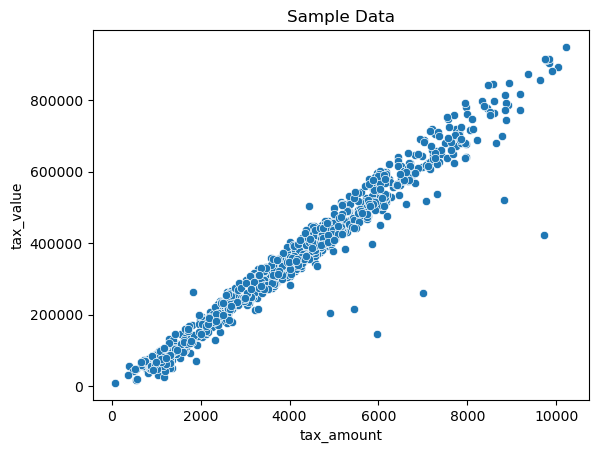

In [22]:
fig, ax = plt.subplots()
sns.scatterplot(x='tax_amount', y='tax_value', data=train_sample, ax=ax)
ax.set(title='Sample Data');

In [23]:
#Lets run a chi squared to compare proportions, to have more confidence
#set variable alpha to 0.05
alpha = 0.05
#set null_hypothesis and alternative_hypothesis variables to a string
#to represent the possible results. 
null_hypothesis = "there is no relationship between tax value and structure_taxvalue"
alternative_hypothesis = "there is a relationship between tax_value and structure_taxvalue"

#Setup a crosstab of observed churn to tenure
observed = pd.crosstab(train.tax_value, train['structure_taxvalue'])

#The stats.chi2_contigency(observed) function does the heavy lifting here. It computes the 
#chi-square statistic and p-value for the hypothesis test of independence. Then passes the 
#values into the variables.
chi2, p, degf, expected = stats.chi2_contingency(observed)

#If statement to print the resultt. If p < alpha you get the first two statements
#If not you get the else statement. 
if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that there is no relationship between tax value and structure_taxvalue
Sufficient evidence to move forward understanding that there is a relationship between tax_value and structure_taxvalue


0.0

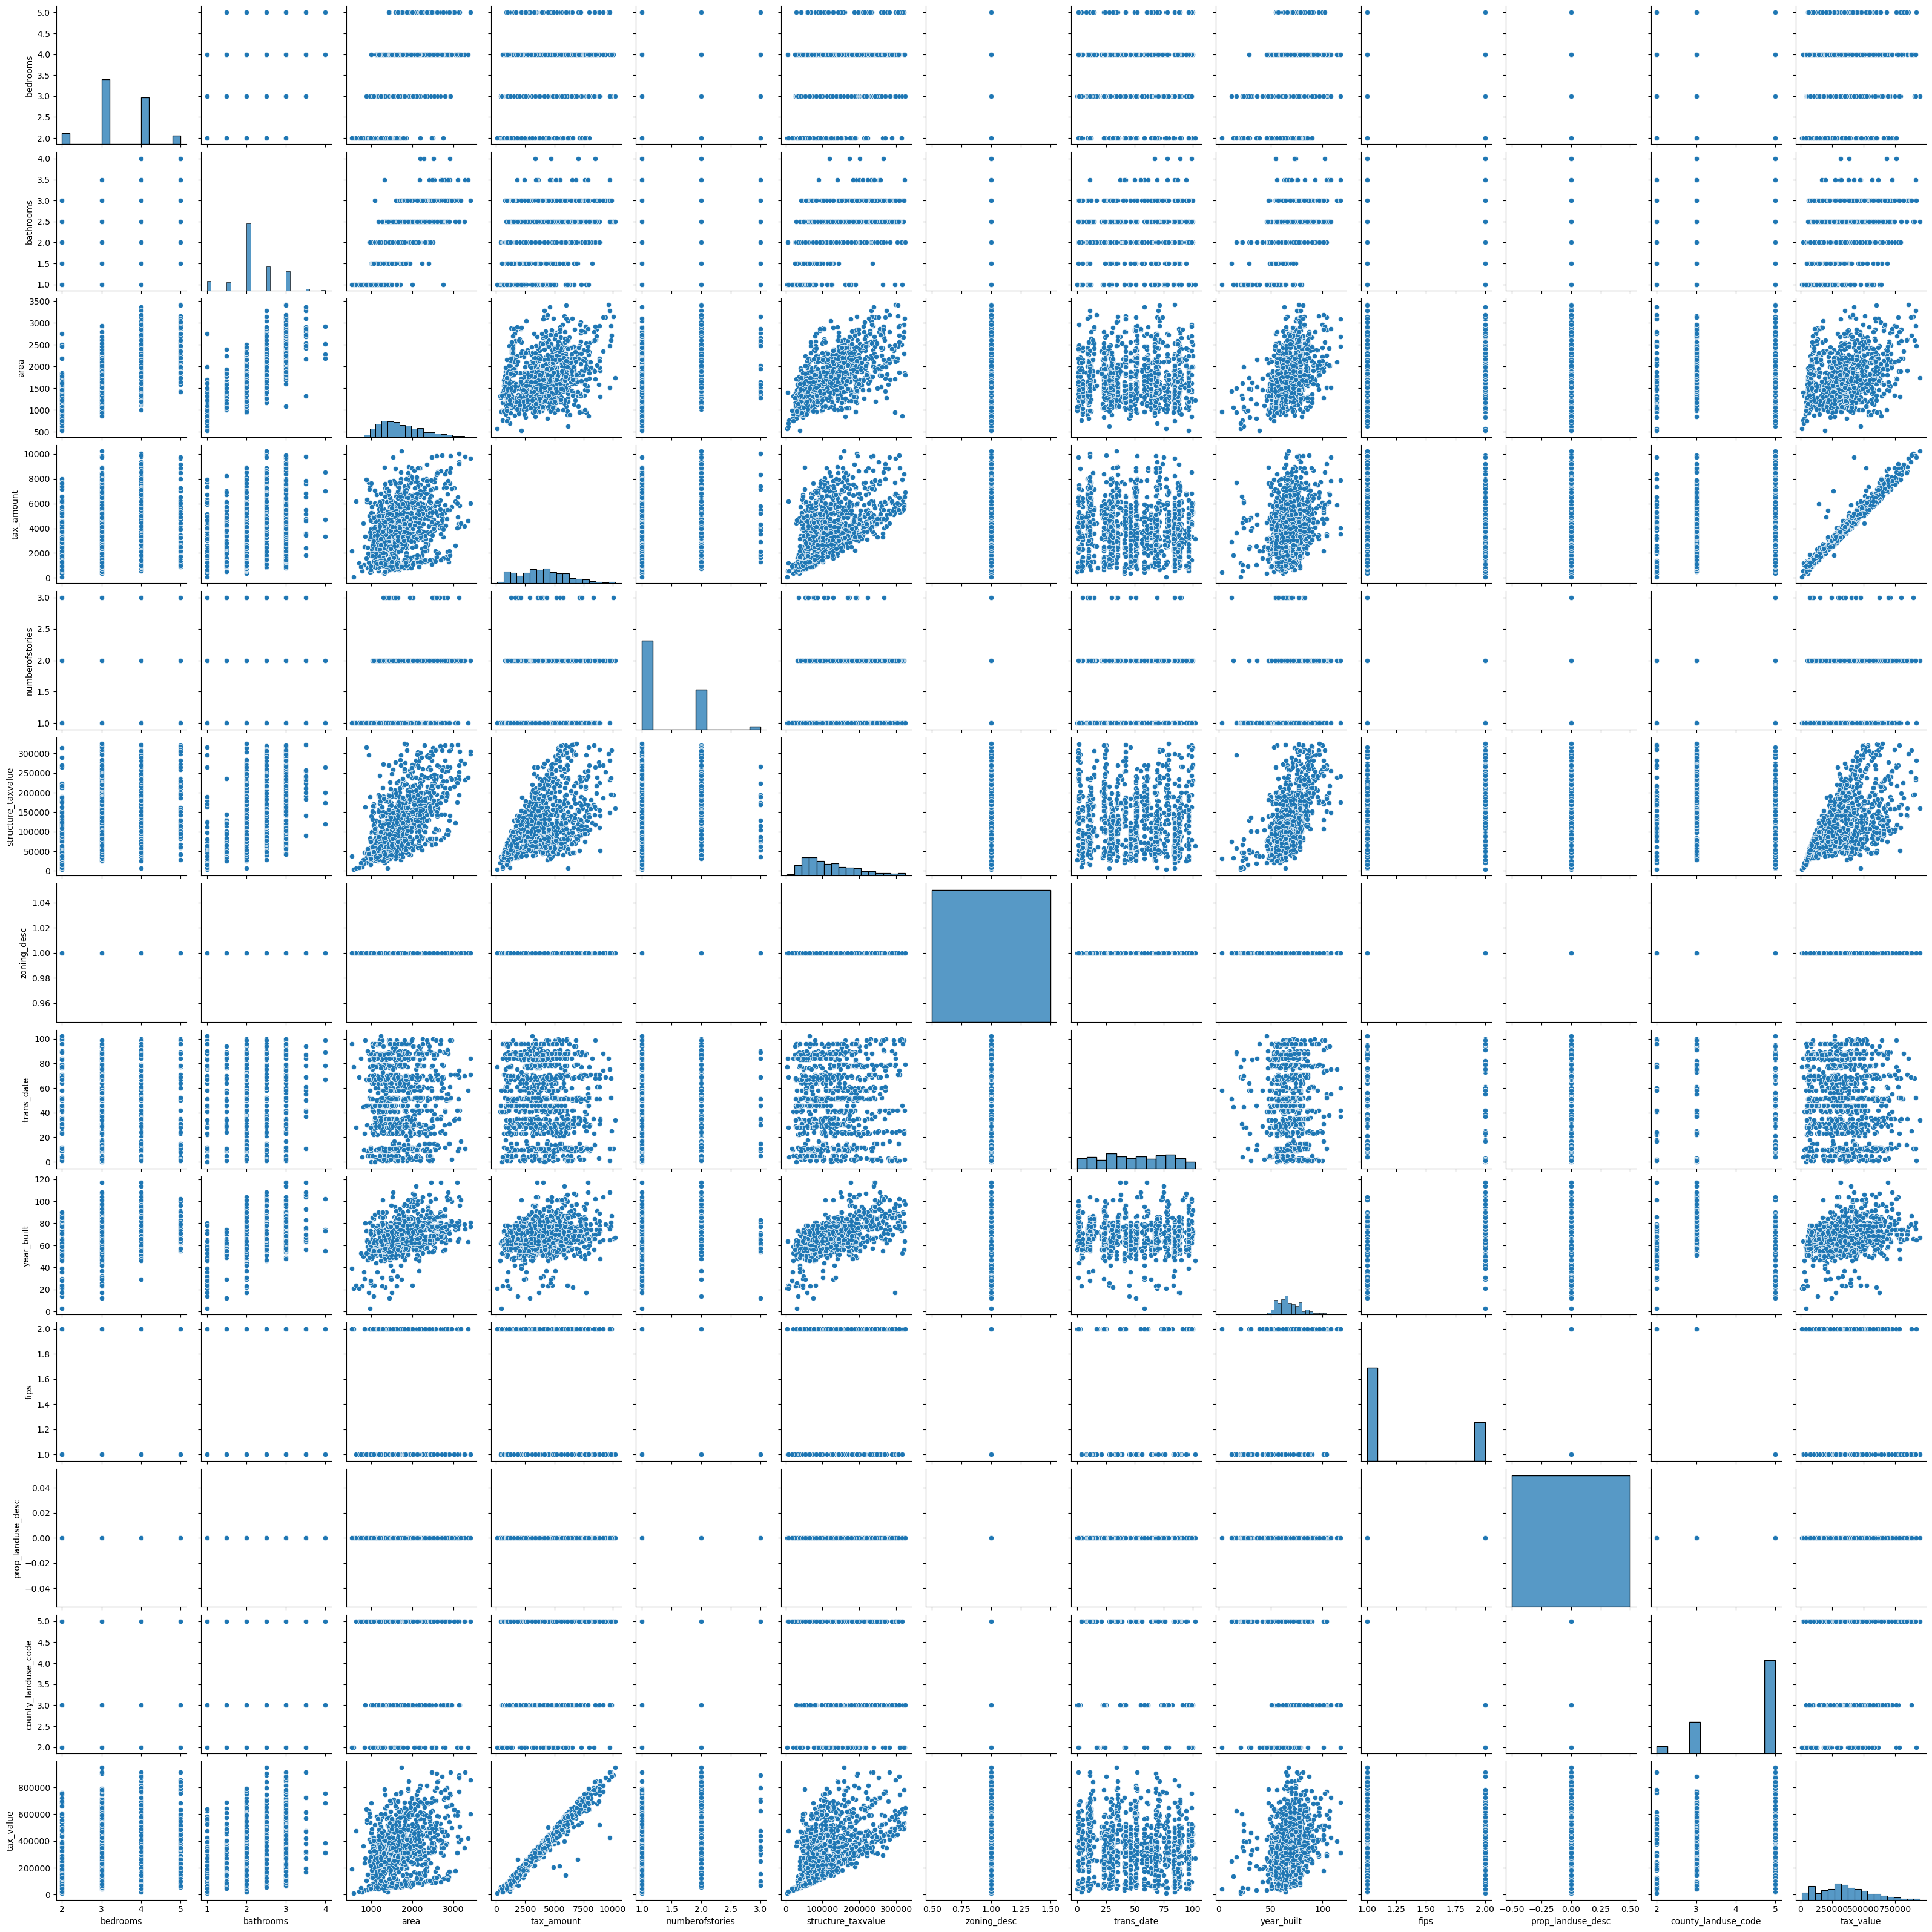

In [24]:
sns.pairplot(train_sample)

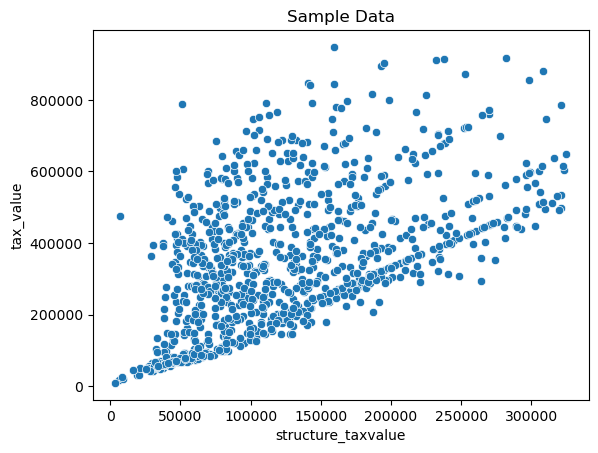

In [25]:
fig, ax = plt.subplots()
sns.scatterplot(x='structure_taxvalue', y='tax_value', data=train_sample, ax=ax)
ax.set(title='Sample Data');

In [26]:
train_sample.corr(method ='pearson')

,bedrooms,bathrooms,area,tax_amount,numberofstories,structure_taxvalue,zoning_desc,trans_date,year_built,fips,prop_landuse_desc,county_landuse_code,tax_value
bedrooms,1.000000,0.502826,0.542108,0.115327,0.202643,0.257760,NaN,-0.022536,0.195310,0.047153,NaN,-0.014804,0.123211
bathrooms,0.502826,1.000000,0.716066,0.273510,0.428631,0.502792,NaN,0.015010,0.492952,0.068818,NaN,-0.041167,0.298512
area,0.542108,0.716066,1.000000,0.335813,0.476878,0.625198,NaN,-0.005030,0.443446,0.083292,NaN,-0.079945,0.367155
tax_amount,0.115327,0.273510,0.335813,1.000000,0.196866,0.536201,NaN,-0.074630,0.264685,-0.014848,NaN,0.020815,0.980911
numberofstories,0.202643,0.428631,0.476878,0.196866,1.000000,0.325772,NaN,0.027977,0.360911,-0.053116,NaN,0.061501,0.205201
structure_taxvalue,0.257760,0.502792,0.625198,0.536201,0.325772,1.000000,NaN,0.001290,0.591746,0.468662,NaN,-0.435893,0.562160
zoning_desc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trans_date,-0.022536,0.015010,-0.005030,-0.074630,0.027977,0.001290,NaN,1.000000,0.008680,0.024795,NaN,-0.025924,-0.074296
year_built,0.195310,0.492952,0.443446,0.264685,0.360911,0.591746,NaN,0.008680,1.000000,0.266914,NaN,-0.202814,0.284482
fips,0.047153,0.068818,0.083292,-0.014848,-0.053116,0.468662,NaN,0.024795,0.266914,1.000000,NaN,-0.978657,-0.005382


model

In [27]:
y_train = train['tax_value']
y_validate = validate['tax_value']
y_test = test['tax_value']

In [28]:
x_train=train.drop(columns='tax_value')
x_validate=validate.drop(columns='tax_value')
x_test=test.drop(columns='tax_value')
x_train_validate=train_validate.drop(columns='tax_value')

In [29]:
modeling_feats = ['bedrooms', 'bathrooms', 'area', 'tax_amount', 'numberofstories',
       'structure_taxvalue', 'zoning_desc', 'trans_date', 'year_built', 'fips',
       'prop_landuse_desc', 'county_landuse_code'] 

In [30]:
def select_kbest(X, y, k=2):
    '''
    X: dataframe of independent features
    y: single pandas Series (a target)
    k: kwarg, a number of k best features to select
    '''
    # make our kbest object:
    kbest = SelectKBest(f_regression, k=k)
    # fit it from x and y's relationships
    kbest.fit(X, y)
    # get the support values:
    mask = kbest.get_support()
    return X.columns[mask]

In [31]:
# try it out!
select_kbest(x_train[modeling_feats], y_train)

Index(['tax_amount', 'structure_taxvalue'], dtype='object')

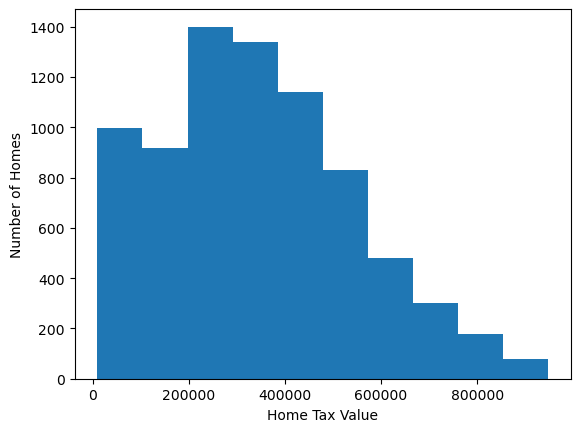

In [32]:
plt.hist(y_train)
plt.xlabel('Home Tax Value')
plt.ylabel('Number of Homes')
plt.show()

In [33]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict tax_value_pred_mean
tax_value_pred_mean = y_train['tax_value'].mean()
y_train['tax_value_pred_mean'] = tax_value_pred_mean
y_validate['tax_value_pred_mean'] = tax_value_pred_mean

# 2. compute tax_value_pred_median
tax_value_pred_median = y_train['tax_value'].median()
y_train['tax_value_pred_median'] = tax_value_pred_median
y_validate['tax_value_pred_median'] = tax_value_pred_median

# 3. RMSE of tax_value_pred_mean
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  197764.33 
Validate/Out-of-Sample:  195345.66


In [34]:
 # 4. RMSE of tax_value_pred_median
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_median)**(1/2)

In [35]:
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Median
Train/In-Sample:  198692.45 
Validate/Out-of-Sample:  196311.79


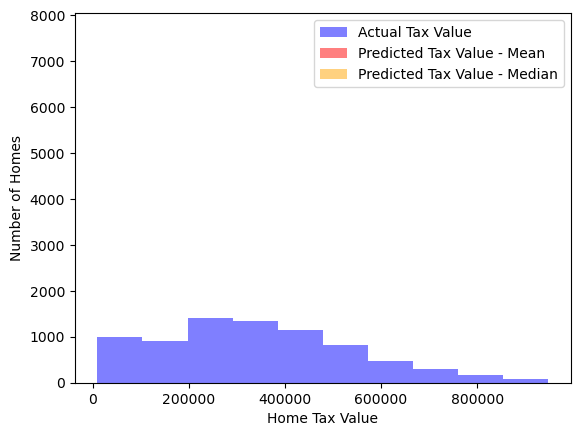

In [36]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.tax_value, color='blue', alpha=.5, label="Actual Tax Value")
plt.hist(y_train.tax_value_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted Tax Value - Mean")
plt.hist(y_train.tax_value_pred_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted Tax Value - Median")
plt.xlabel("Home Tax Value")
plt.ylabel("Number of Homes")
plt.legend()
plt.show()

In [37]:
# create the model object
lm = LinearRegression(normalize=True)
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(x_train, y_train.tax_value)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [38]:
object_cols = np.array(x_train.dtypes == 'object')

numeric_cols = [col for col in x_train.columns.values if col not in object_cols]
numeric_cols

/var/folders/nl/h7bb3qxn0s5dcp9j1thjq_4h0000gn/T/ipykernel_28263/4037530399.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  numeric_cols = [col for col in x_train.columns.values if col not in object_cols]


['bedrooms',
 'bathrooms',
 'area',
 'tax_amount',
 'numberofstories',
 'structure_taxvalue',
 'zoning_desc',
 'trans_date',
 'year_built',
 'fips',
 'prop_landuse_desc',
 'county_landuse_code']

In [39]:
x_train_scaled, x_validate_scaled, x_test_scaled = wrangle.minmax_scaler(x_train, x_validate, x_test, numeric_cols)

In [40]:
# predict train
y_train['tax_value_pred_lm'] = lm.predict(x_train)
# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm)**(1/2)
# predict validate
y_validate['tax_value_pred_lm'] = lm.predict(x_validate)
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  36187.26511970554 
Validation/Out-of-Sample:  37093.687614606846
